Back to the main [Index](../index.ipynb)

## FATBANDS.nc file

The `FATBANDS.nc` contains the projection of the KS wavefunctions onto atom-centered
functions with given angular momentum $L$. 
The file is generated by using the `prtdos` variable either in a SCF or NSCF run.
One can use the `abiopen` function provided by `abilab` to open the file and generate an instance of `FatbandsFile`.
Alternatively, one can use the `abiopen.py` script to open the file inside the shell with the syntax:

    abiopen.py out_FATBANDS.nc 
    
This command will start the ipython interpreter so that one can interact directly with the `FatbandFile` object (named `abifile` inside ipython).
To generate a jupyter notebook use:

    abiopen.py out_FATBANDS.nc -nb

In [1]:
from __future__ import print_function
%matplotlib notebook

from abipy import abilab
import abipy.data as abidata

In [2]:
# This fatbands file has been produced on a k-path so it's not suitable for DOS calculations.
fbnc_kpath = abilab.abiopen(abidata.ref_file("mgb2_kpath_FATBANDS.nc"))

# Print file info (dimensions, variables ...)
# Note that prtdos = 3, so LM decomposition is not available.
print(fbnc_kpath)

================================= File Info =================================
Name: mgb2_kpath_FATBANDS.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/mgb2_fatbands
Size: 149.01 kb
Access Time: Mon Feb 27 12:52:18 2017
Modification Time: Fri Feb 24 15:10:40 2017
Change Time: Fri Feb 24 15:10:40 2017

============================== Electronic Bands ==============================
Full Formula (Mg1 B2)
Reduced Formula: MgB2
abc   :   3.086000   3.086000   3.523000
angles:  90.000000  90.000000 120.000000
Sites (3)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  B     0.333333  0.666667  0.5
  2  B     0.666667  0.333333  0.5

Number of electrons: 8.0, Fermi level: 6.851 [eV]
nsppol: 1, nkpt: 78, mband: 8, nspinor: 1, nspden: 1
smearing scheme: none, tsmear_eV: 0.272, occopt: 1
Direct gap:
    Energy: 0.312 [eV]
    Initial state: spin=0, kpt=[0.050, 0.050, 0.000], weight=0.000, band=2, eig=6.621, occ=2.000
    Final

<IPython.core.display.Javascript object>


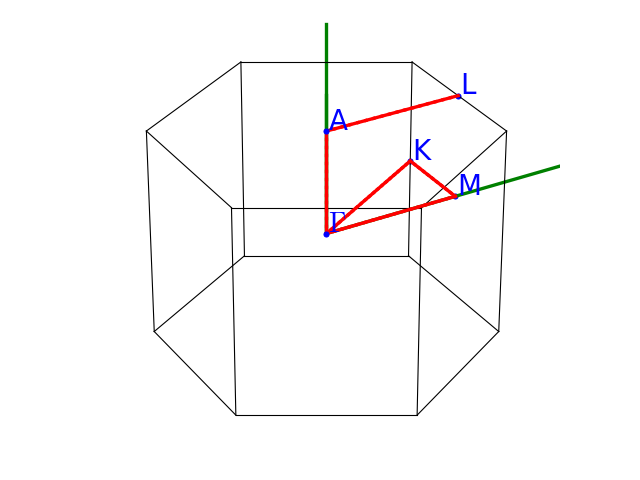

In [3]:
# Plot the k-points belonging to the path.
fig = fbnc_kpath.ebands.kpoints.plot()

<IPython.core.display.Javascript object>


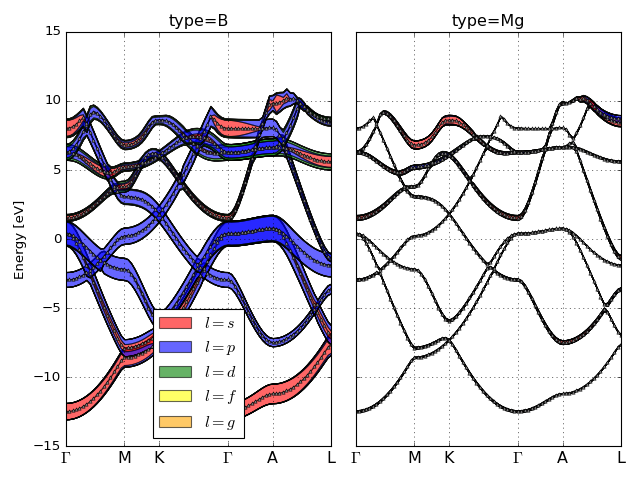

In [4]:
# Plot the electronic fatbands grouped by atomic type.
fig = fbnc_kpath.plot_fatbands_typeview(tight_layout=True)

<IPython.core.display.Javascript object>


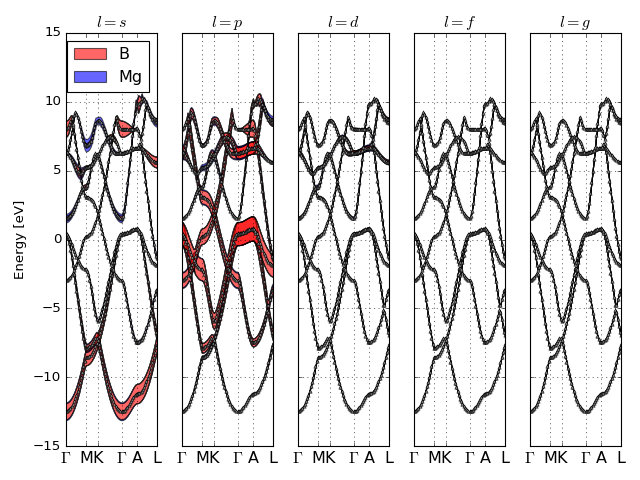

In [5]:
# Plot the electronic fatbands grouped by L.
fig = fbnc_kpath.plot_fatbands_lview(tight_layout=True)

In [6]:
# Now we read another FATBANDS file produced on 18x18x18 k-mesh
fbnc_kmesh = abilab.abiopen(abidata.ref_file("mgb2_kmesh181818_FATBANDS.nc"))
print(fbnc_kpath)
#fbnc_kmesh.ebands.kpoints.plot()

================================= File Info =================================
Name: mgb2_kpath_FATBANDS.nc
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/mgb2_fatbands
Size: 149.01 kb
Access Time: Mon Feb 27 12:52:21 2017
Modification Time: Fri Feb 24 15:10:40 2017
Change Time: Fri Feb 24 15:10:40 2017

============================== Electronic Bands ==============================
Full Formula (Mg1 B2)
Reduced Formula: MgB2
abc   :   3.086000   3.086000   3.523000
angles:  90.000000  90.000000 120.000000
Sites (3)
  #  SP           a         b    c
---  ----  --------  --------  ---
  0  Mg    0         0         0
  1  B     0.333333  0.666667  0.5
  2  B     0.666667  0.333333  0.5

Number of electrons: 8.0, Fermi level: 6.851 [eV]
nsppol: 1, nkpt: 78, mband: 8, nspinor: 1, nspden: 1
smearing scheme: none, tsmear_eV: 0.272, occopt: 1
Direct gap:
    Energy: 0.312 [eV]
    Initial state: spin=0, kpt=[0.050, 0.050, 0.000], weight=0.000, band=2, eig=6.621, occ=2.000
    Final

<IPython.core.display.Javascript object>


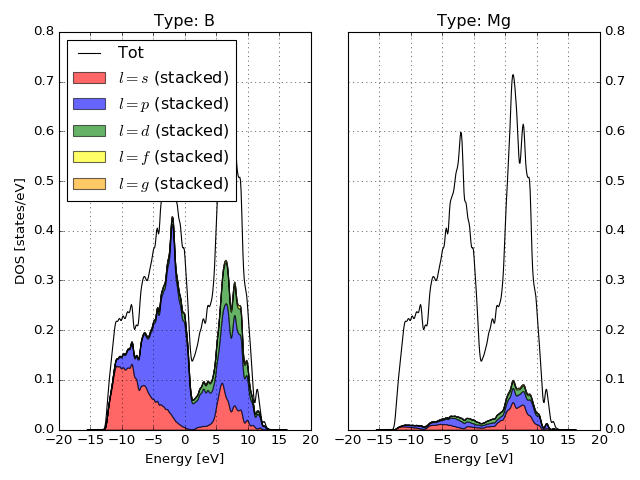

In [7]:
# Plot the L-PJDOS grouped by atomic type.
fig = fbnc_kmesh.plot_pjdos_typeview(tight_layout=True)

<IPython.core.display.Javascript object>


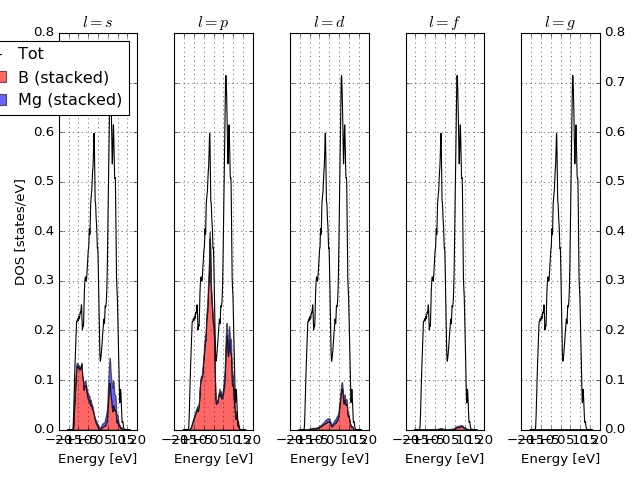

In [8]:
# Plot the L-PJDOS grouped by L.
fig = fbnc_kmesh.plot_pjdos_lview(tight_layout=True)

<IPython.core.display.Javascript object>


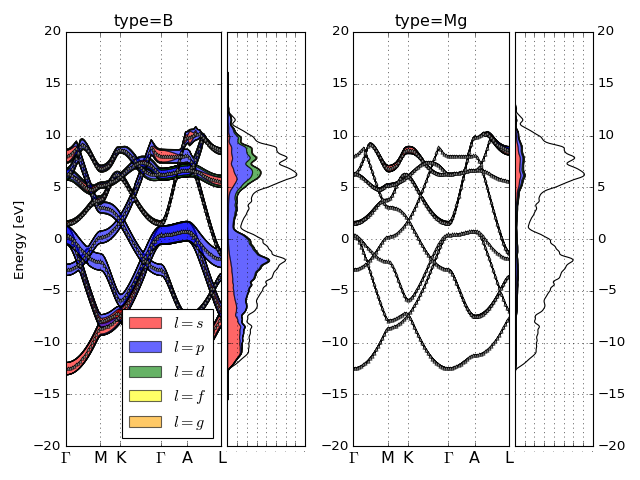

In [9]:
# Now we use the two netcdf files to produce plots with fatbands + PJDOSEs.
# The data for the DOS is taken from pjdosfile.
fig = fbnc_kpath.plot_fatbands_with_pjdos(pjdosfile=fbnc_kmesh, view="type", tight_layout=True)

<IPython.core.display.Javascript object>


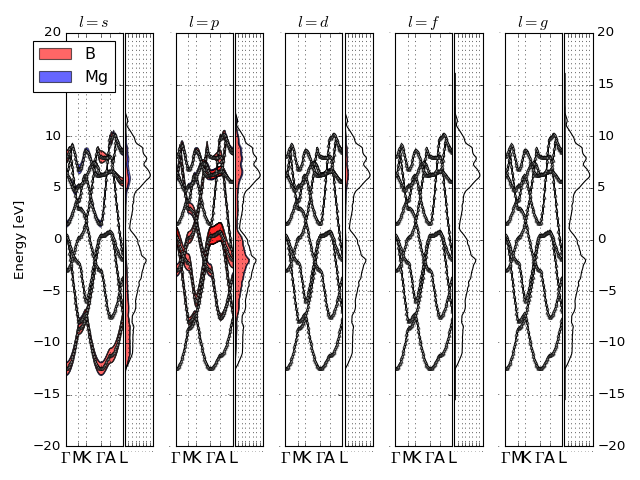

In [10]:
# fatbands + PJDOS grouped by L
fig = fbnc_kpath.plot_fatbands_with_pjdos(pjdosfile=fbnc_kmesh, view="lview", tight_layout=True)

In [11]:
# Remember to close the files
fbnc_kpath.close()
fbnc_kmesh.close()